# Python for Data Science

## Lecture 6:  SciPy numerical methods

### Python Scientific stack
|   Package |    |
| --- | --- |
| NumPy | Efficient N-dimensional arrays |
| **SciPy** | **Numerical methods** |
| Matplotlib | Graphs and plots  |
| IPython (Jupyter) | Interactive notebooks |
| SymPy | Symbolical computations |
| Pandas | Data mining |

In [1]:
import sympy as sym
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy


# Numerical methods
The aim of the numerical calculations is to solve mathematical problems efficiently.

Advantages:
 - Fast
 - Useful
 - Many practical appliations
 
Disadvantages:
 - Gives only an approximate result
 - You need to pay attention to innacuracies 
 - Mathematical intuition is inhibited by numerical methods when discussing theoretical questions (e.g. do you know which number's approximation is the following? 2.732050807568877)

## SciPy
Detailed tutorial: https://docs.scipy.org/doc/scipy/reference/tutorial/

SciPy runs Fortran many times in the background

Sub-packages:

|||
| --- | --- |
| scipy.cluster	| Vector quantization / Kmeans |
| scipy.constants |	Physical and mathematical constants |
|scipy.fftpack |	Fourier transform
|scipy.integrate |	Integration routines
|scipy.interpolate |	Interpolation
|scipy.io |	Data input and output
|scipy.linalg |	Linear algebra routines
|scipy.ndimage |	n-dimensional image package
|scipy.odr |	Orthogonal distance regression
|scipy.optimize |	Optimization
|scipy.signal |	Signal processing
|scipy.sparse |	Sparse matrices
|scipy.spatial |	Spatial data structures and algorithms
|scipy.special |	Any special mathematical functions
|scipy.stats |	Statistics|



In [2]:
from scipy import linalg, optimize

### Linear algebra
LU decomposition

In [3]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)
print(A,p,l,u, sep="\n")
np.allclose(A - p @ l @ u, np.zeros((4, 4)))

[[2 5 8 7]
 [5 2 2 8]
 [7 5 6 6]
 [5 4 4 8]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.12        1.          0.        ]
 [ 0.71428571 -0.44       -0.46153846  1.        ]]
[[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  6.28571429  5.28571429]
 [ 0.          0.         -1.04        3.08      ]
 [ 0.          0.          0.          7.46153846]]


True

QR decomposition
Q ortogonal, R upper triangular matrix

In [4]:
A = np.random.randn(4, 4)
print(A)
q, r = linalg.qr(A)
print(q,r,sep='\n')

[[ 1.3109994   0.32853171  0.5095348   0.01708006]
 [-1.34716863 -0.53707191  1.06612225  1.0686572 ]
 [-0.45961448  1.15137397  0.71702386  0.9500599 ]
 [-0.77780435  0.76953939  0.22649502  0.15152269]]
[[-0.62858999  0.21071898 -0.67699301  0.31961322]
 [ 0.64593219 -0.34766281 -0.67632115  0.06702155]
 [ 0.22037315  0.75872197 -0.23562997 -0.56591092]
 [ 0.37293688  0.50898826  0.1695544   0.75703391]]
[[-2.08561929 -0.01270225  0.61083535  0.94541982]
 [ 0.          1.52120705  0.39602266  0.43002131]
 [ 0.          0.         -1.1965416  -0.93248979]
 [ 0.          0.          0.         -0.34585938]]


In [5]:
q @ q.T

array([[1.00000000e+00, 2.77555756e-17, 1.52655666e-16, 0.00000000e+00],
       [2.77555756e-17, 1.00000000e+00, 1.66533454e-16, 0.00000000e+00],
       [1.52655666e-16, 1.66533454e-16, 1.00000000e+00, 9.02056208e-17],
       [0.00000000e+00, 0.00000000e+00, 9.02056208e-17, 1.00000000e+00]])

## Integration

The `scipy.integrate.quad(f, a, b)` integrates function f from a to b. It returns two values, one is the value of the integral, the other is the margin of error.

In [6]:
import scipy.integrate
f= lambda x:2*x
i = scipy.integrate.quad(f, 0, 1)
print(i)

(1.0, 1.1102230246251565e-14)


In [7]:
f= lambda x:np.exp(-x**2)
i = scipy.integrate.quad(f, 0, 1)
print(i)

(0.7468241328124271, 8.291413475940725e-15)


In [8]:
## with symbolic calculation
xval = sym.Symbol('x')
sym.integrate(sym.exp(-xval ** 2),  xval)

sqrt(pi)*erf(x)/2

In [9]:
((sym.erf(1)-sym.erf(0))*np.pi**(1/2)/2).evalf()

0.746824132812427

###### Let's try an 'ugly' function

In [10]:
#sym.integrate(sym.exp(sym.sin(-sym.log(xval ** 2+xval)-xval)),  xval)

In [11]:
f= lambda x:np.exp(np.sin(-np.log(x ** 2+x)-x))
i = scipy.integrate.quad(f, 0, 1)
print(i)


(1.1008683826459191, 9.950209101106111e-09)


We can calculate integrals with multiple variables using ` scipy.integrate.dblquad(func, a, b, gfun, hfun)` command. The `gfun` and `hfun` values set the interval of the inner integral.


$$\int_{0}^{1/2} \big(  \int_{0}^{\sqrt{1-4y^2}} 16xy \:dx\big)dy$$


In [12]:
f = lambda x, y : 16*x*y
g = lambda x : 0
h = lambda y : math.sqrt(1-4*y**2)
i = scipy.integrate.dblquad(f, 0, 0.5, g, h)
print(i)

(0.5, 1.7092350012594845e-14)


## Interpolation


In [13]:
from scipy import interpolate

x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
print (x,y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


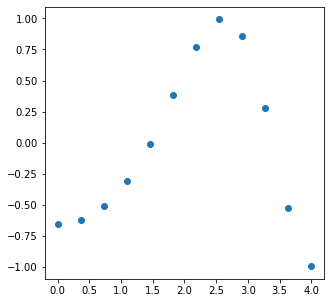

In [14]:
figure, axis = plt.subplots(1, 1,figsize=(5,5))
axis.plot(x, y,'o')
plt.show()

In [15]:
f1 = interpolate.interp1d(x, y,kind = 'linear')

f2 = interpolate.interp1d(x, y, kind = 'cubic')

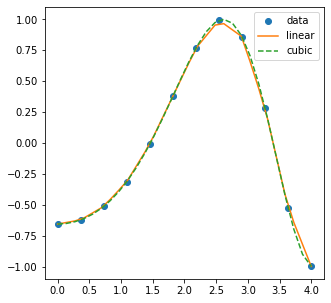

In [16]:
xnew = np.linspace(0, 4,30)

#plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
figure, axis = plt.subplots(1, 1,figsize=(5,5))
axis.plot(x, y, 'o')
axis.plot( xnew, f1(xnew), '-')
axis.plot( xnew, f2(xnew), '--')

axis.legend(['data', 'linear', 'cubic'], loc = 'best')

plt.show()

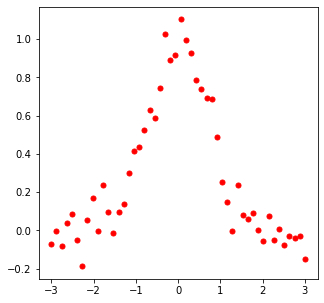

In [17]:
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
figure, axis = plt.subplots(1, 1,figsize=(5,5))
axis.plot(x, y, 'ro', ms = 5)
plt.show()

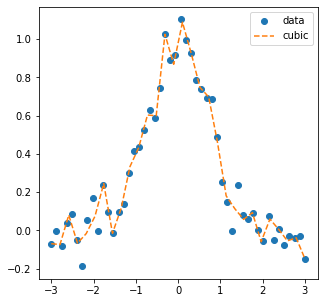

In [18]:
f2 = interpolate.interp1d(x, y, kind = 'cubic')
xnew = np.linspace(-3, 3,30)

#plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
figure, axis = plt.subplots(1, 1,figsize=(5,5))
axis.plot(x, y, 'o')
axis.plot( xnew, f2(xnew), '--')

axis.legend(['data', 'cubic' ], loc = 'best')

plt.show()

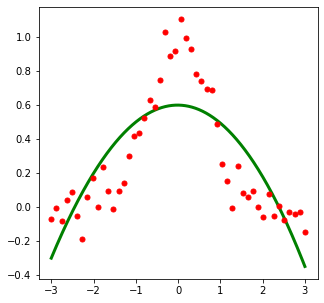

In [19]:

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
figure, axis = plt.subplots(1, 1,figsize=(5,5))
axis.plot(xs, spl(xs), 'g', lw = 3)
axis.plot(x, y, 'ro', ms = 5)
plt.show()

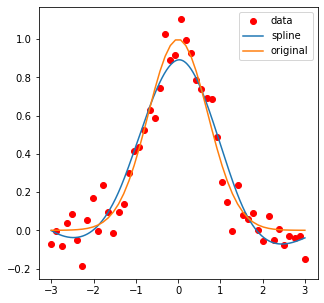

In [20]:
spl.set_smoothing_factor(0.5)
figure, axis = plt.subplots(1, 1,figsize=(5,5))
axis.plot(x, y, 'ro') 
axis.plot(xs, spl(xs)) 
axis.plot(x,np.exp(-x**2), ms = 5)
axis.legend(['data', 'spline', 'original'], loc = 'best')
plt.show()

B-spline representation

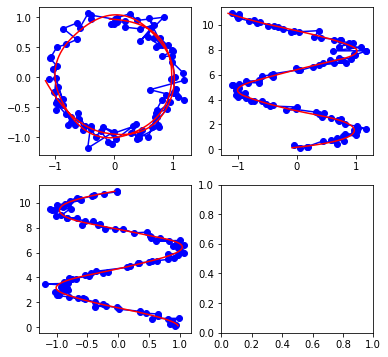

In [21]:
t=np.linspace(0,1.75*2*np.pi,100)

x = np.sin(t)
y = np.cos(t)
z = t

# add noise
x+= np.random.normal(scale=0.1, size=x.shape)
y+= np.random.normal(scale=0.1, size=y.shape)
z+= np.random.normal(scale=0.1, size=z.shape)

# spline parameters
s=3.0 # smoothness parameter
k=2 # spline order
nest=-1 # estimate of number of knots needed (-1 = maximal)

# find the knot points
tckp,u = scipy.interpolate.splprep([x,y,z],s=s,k=k,nest=-1)

# evaluate spline, including interpolated points
xnew,ynew,znew = scipy.interpolate.splev(np.linspace(0,1,400),tckp)

figure, axis = plt.subplots(2, 2,figsize=(6,6))

axis[0,0].plot(x,y,'bo-',label='data')
axis[0,0].plot(xnew,ynew,'r-',label='fit')

axis[0,1].plot(x,z,'bo-',label='data')
axis[0,1].plot(xnew,znew,'r-',label='fit')

axis[1,0].plot(y,z,'bo-',label='data')
axis[1,0].plot(ynew,znew,'r-',label='fit')



plt.show()

### Least squares approximation


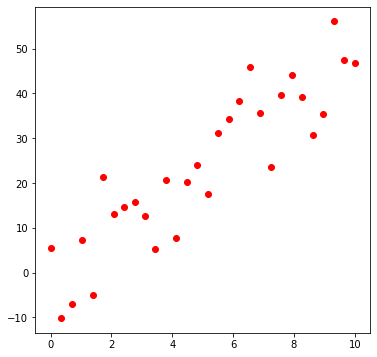

In [22]:
f = np.poly1d([5, 1])

x = np.linspace(0, 10, 30)
y = f(x) + 6*np.random.normal(size=len(x))
xn = np.linspace(0, 10, 200)

figure, axis = plt.subplots(1, 1,figsize=(6,6))
axis.plot(x, y, 'or')
plt.show()


In [23]:
a = np.vstack([x, np.ones(len(x))]).T
np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, y))

array([ 5.14187307, -2.00170457])

In [24]:
np.linalg.lstsq(a, y,rcond=None)[0]

array([ 5.14187307, -2.00170457])

In [25]:
np.polyfit(x, y, 1)

array([ 5.14187307, -2.00170457])

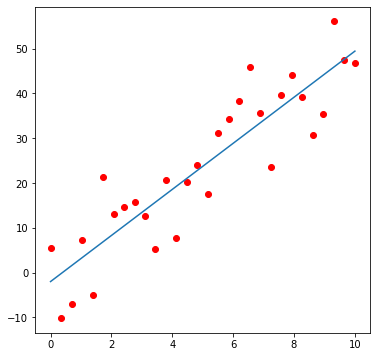

In [26]:
m, c = np.polyfit(x, y, 1)
yn = np.polyval([m, c], xn)

figure, axis = plt.subplots(1, 1,figsize=(6,6))
axis.plot(x, y, 'or')
axis.plot(xn, yn)
plt.show()

Tutorial: https://mmas.github.io/least-squares-fitting-numpy-scipy

### Finding roots
We can use the ` scipy.optimize.root(fn,x0)` function. This runs a selection of iterative methods in the background for constant improvement of the given solution. The second parameter requires the initial 'guess' of the root's value.


In [27]:
from scipy.optimize import root
def func(x):
   return x*2 + 2 * np.cos(x)
sol = root(func,0)
print(sol)


    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.33573186e-13])
       r: array([-3.34722404])
  status: 1
 success: True
       x: array([-0.73908513])


In [28]:
func(-0.73908513) 

1.0761863178387898e-08

In [29]:
sym.solveset( xval*2 + 2 * sym.cos(xval), xval) # a szimolikus megoldó csak széttárja a kezét.

ConditionSet(x, Eq(2*x + 2*cos(x), 0), Complexes)

## Geometric algorythms

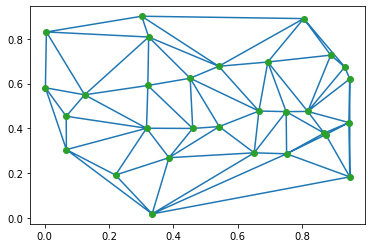

In [30]:
from scipy.spatial import Delaunay
points = np.random.rand(30, 2) # 30 random points in 2-D
tri = Delaunay(points)
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

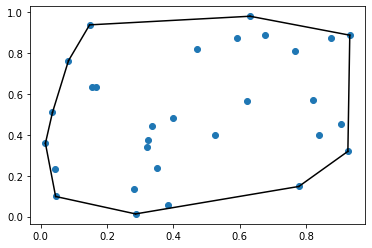

In [31]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2) # 30 random points in 2-D
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

### Signal processing

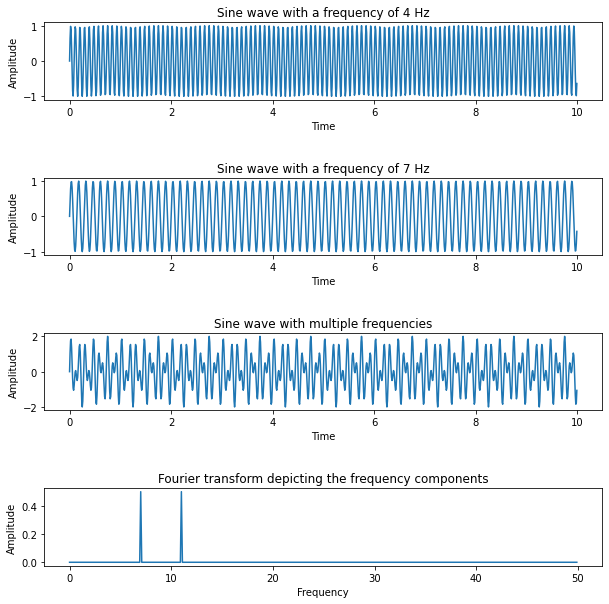

In [32]:
# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 100;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
endTime             = 10; 

# Frequency of the signals
signal1Frequency     = 11;
signal2Frequency     = 7;

# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

# Create subplot
figure, axis = plt.subplots(4, 1,figsize=(10,10))
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Add the sine waves
amplitude = amplitude1 + amplitude2

# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency
 
tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod
# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourierTransform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')

plt.show()